Hello there!

My name is Ernest and I will review your project. I hope you enjoyed working on it.  
If there are any inaccuracies in the solution, then I will draw your attention to them. Please try to find the error and fix it first.  
However, if there are difficulties, please, let me know. I will be able to clarify and suggest something more.

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

 Let me know if there is a better way to gather the value counts and then filter popular_types into df_50 
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

I have added some information below. Please feel free to ask questions here, I will try to help.  
If you need to discuss something during the meeting, please contact your tutor. Unfortunately, the reviewers are not supposed to participate in meetings.
    
</div>

# What sells a car?
Objective is to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [2]:
# Loading all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt


### Load data

In [3]:
# Load the data file into a DataFrame
df = pd.read_csv('vehicles_us.csv')

# Checking to see the data has properly loaded
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [4]:
# print the general/summary information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# check the structure 
print('The shape of data is', df.shape, 'with {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The shape of data is (51525, 13) with 51525 rows and 13 columns


In [6]:
# print a sample of data
df.head(5)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [7]:
df.duplicated().sum()

0



### Comments--if any--for each attribute : 

1. `Price`: 
2. `model_year`: missing values, bool should be int, 
3. `model`: 
4. `condition`: like new -> like_new?
5. `cylinders`: should be int, 
6. `fuel`:
7. `odometer`: missing values
8. `transmission`:
9. `type`: SUV --> suv for uniformity reasons
10. `paint_color`: missing values 
11. `is_4wd`: missing values, binary 1 for yes and 0 for no, should be int rather than float. 
12. `date_posted`: should be date_time
13. `days_listed`: 




### General conclusion based on first observastion: 
We can see that `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd` all have some missing data or 'NaNs'. We can also see that we have some float datatype which will have to be converted to int. We could potentially column names such as model_year to year, and paint_color to color. Date_posted should be a date_time value. No duplicates found.

### Conclusions and further steps


1. Missing values - we can either remove those rows or impute based on mean/median/mode
2. For the columns with incorrect data types that should be a simple fix with a quick apply function
3. More cleansing may be needed to be done after the data is explored in more detail.

## Treat missing values (if any)

In [8]:
# Function to check for missing values
def check_missing_data(data):
    # check for any missing data in the df (display in descending order)
    return data.isnull().sum().sort_values(ascending=False)

In [9]:
check_missing_data(df)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
days_listed         0
date_posted         0
type                0
transmission        0
fuel                0
condition           0
model               0
price               0
dtype: int64

In [10]:
count = (df['is_4wd'] == 0).sum()
print('Count of zeros : ', count)

count = (df['is_4wd'] == 1).sum()
print('Count of ones : ', count)

Count of zeros :  0
Count of ones :  25572


Comments:
Total values = 51525
Since we have half is_4wd missing values. This is a binary column where we have 1 for yes and 0 for no. 
It looks like it's treating 0 values as NaN so we'll replace them with 0s below to reflect the 0s accurately. Either way this is better than completely removing the column. 


In [11]:
# Treating is_4wd column
df['is_4wd'].fillna(0, inplace = True)

In [12]:
# Check
df['is_4wd'].isna().sum()

0

In [13]:
# fill in missing values in the paint_color with others
df['paint_color'].fillna(value='others', inplace = True)

In [14]:
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,others,0.0,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,others,0.0,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,others,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,others,0.0,2018-11-24,89


In [15]:
# Impute odometer with mean/median which are approximately the same so shouldn't make much different
df['odometer'].fillna(value = df.odometer.median(), inplace = True)

In [16]:
df[df['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,others,0.0,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,others,0.0,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,others,0.0,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,0.0,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,0.0,2018-06-22,28


In [17]:
# Median cylinder values to fill the NaN
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median())


In [18]:
df[df['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,6.0,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [19]:
check_missing_data(df)

model_year      3619
days_listed        0
date_posted        0
is_4wd             0
paint_color        0
type               0
transmission       0
odometer           0
fuel               0
cylinders          0
condition          0
model              0
price              0
dtype: int64

In [20]:
# Drop the rows where we don't know the year as this attribute will have a huge impact on the price
df_new = df.dropna()

In [21]:
df1 = pd.DataFrame(df_new)

In [22]:
check_missing_data(df1)

days_listed     0
date_posted     0
is_4wd          0
paint_color     0
type            0
transmission    0
odometer        0
fuel            0
cylinders       0
condition       0
model           0
model_year      0
price           0
dtype: int64

## Fix data types

In [23]:
df1.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,others,1.0,2018-06-23,19
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,others,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


In [24]:
# convert data to the required types (some for memory purposes) -- OLD ('I'll remove this later)
df1['model_year'] = df1['model_year'].astype('int32')
df1['cylinders'] = df1['cylinders'].astype('int32')
df1['odometer'] = df1['odometer'].astype('int32')
df1['is_4wd'] = df1['is_4wd'].astype('int32')
df1['price'] = df1['price'].astype('int32')
df1['days_listed'] = df1['days_listed'].astype('int32')



In [25]:
# convert data to the required types (some for memory purposes)
df1[['model_year', 
     'cylinders', 
     'odometer', 
     'is_4wd', 
     'price', 
     'days_listed']
   ] = df1[
    ['model_year', 'cylinders', 'odometer', 'is_4wd', 'price', 'days_listed']
].astype('int32')

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         47906 non-null  int32 
 1   model_year    47906 non-null  int32 
 2   model         47906 non-null  object
 3   condition     47906 non-null  object
 4   cylinders     47906 non-null  int32 
 5   fuel          47906 non-null  object
 6   odometer      47906 non-null  int32 
 7   transmission  47906 non-null  object
 8   type          47906 non-null  object
 9   paint_color   47906 non-null  object
 10  is_4wd        47906 non-null  int32 
 11  date_posted   47906 non-null  object
 12  days_listed   47906 non-null  int32 
dtypes: int32(6), object(7)
memory usage: 4.0+ MB


At this point, we've taken care of null values and changed to proper data types. 

## Enrich data

In [27]:
# Add datetime values for when the ad was placed
df1['date_posted'] = pd.to_datetime(df1['date_posted'], format='%Y-%m-%d')

In [29]:
# Add the vehicle's age when the ad was placed
df1['age']= (df1['date_posted'].dt.year - df['model_year'])

In [30]:
# Add the vehicle's average mileage per year
df1['yearly_mileage'] = df1['odometer']/df1['age'].where(lambda x: x < float('inf'), 0)

In [31]:
# It might help to replace the condition values with something that can be manipulated more easily


# replace string values in `condition` column
df1['condition'] = df_new['condition'].replace(
    ['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], 
    [5, 4, 3, 2, 1, 0]
)
#  numbers reflect the condition respectively 

## Check clean data

In [32]:
# print the general/summary information about the DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           47906 non-null  int32         
 1   model_year      47906 non-null  int32         
 2   model           47906 non-null  object        
 3   condition       47906 non-null  int64         
 4   cylinders       47906 non-null  int32         
 5   fuel            47906 non-null  object        
 6   odometer        47906 non-null  int32         
 7   transmission    47906 non-null  object        
 8   type            47906 non-null  object        
 9   paint_color     47906 non-null  object        
 10  is_4wd          47906 non-null  int32         
 11  date_posted     47906 non-null  datetime64[ns]
 12  days_listed     47906 non-null  int32         
 13  age             47906 non-null  float64       
 14  yearly_mileage  47904 non-null  float64       
dtypes:

In [33]:
df1.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,age,yearly_mileage
count,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,4.790400e+04
mean,12160.465203,2009.750470,2.638605,6.113368,115053.673632,0.496055,39.564835,8.556966,inf
std,10082.453773,6.282065,0.711839,1.572898,60019.830639,0.499990,28.201967,6.295266,NaN
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5000.000000,2006.000000,2.000000,4.000000,79000.000000,0.000000,19.000000,4.000000,1.054545e+04
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,0.000000,33.000000,7.000000,1.541743e+04
75%,16900.000000,2014.000000,3.000000,8.000000,146327.000000,1.000000,53.000000,12.000000,2.300000e+04
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.000000,110.000000,inf


In [34]:
# print a sample of data
df1.head()
# We have 0/year which gave us a NaN values, let's replace these with 0 
df1[df1['yearly_mileage'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,yearly_mileage
17037,45400,2018,ram 3500,3,6,diesel,0,automatic,pickup,black,1,2018-12-16,18,0.0,NaN
40489,15900,2018,toyota prius,3,6,hybrid,0,automatic,hatchback,blue,0,2018-07-30,31,0.0,NaN


In [35]:
df1['yearly_mileage'].fillna(0, inplace = True)

In [36]:
# check for infinity after calculation in the average miles per year column
df1[np.isinf(df1['yearly_mileage'])]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,yearly_mileage
19,13990,2018,hyundai elantra,3,4,gas,31932,automatic,sedan,red,0,2018-08-25,27,0.0,inf
71,23300,2018,nissan frontier crew cab sv,2,6,gas,27493,other,pickup,others,1,2018-10-13,36,0.0,inf
78,23800,2019,nissan frontier crew cab sv,2,6,gas,10899,other,pickup,silver,1,2019-02-28,30,0.0,inf
99,39950,2018,chevrolet silverado,3,8,gas,18500,automatic,truck,others,1,2018-08-05,16,0.0,inf
106,21500,2019,nissan frontier crew cab sv,2,6,gas,16168,other,pickup,white,0,2019-03-29,70,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,27890,2018,ram 1500,3,8,gas,9446,automatic,truck,others,1,2018-05-06,39,0.0,inf
51442,28990,2018,ford f150,3,6,gas,10152,automatic,truck,white,1,2018-06-13,47,0.0,inf
51446,15999,2018,chevrolet malibu,3,4,gas,50502,automatic,sedan,black,0,2018-07-28,8,0.0,inf
51447,33990,2019,ram 1500,3,8,gas,9000,automatic,truck,white,1,2019-01-25,36,0.0,inf


In [37]:
# Looks like we have inf because age is less than 1 year, so we'll replace the yearly mileage with the actual mileage
# convert inf to NaN and change NaN's to 0 of type 'int'
df1['yearly_mileage'] = pd.to_numeric(df1['yearly_mileage'], errors='coerce')
df1['yearly_mileage'] = df1['yearly_mileage'].replace(np.inf, int(float(0)))
df1['yearly_mileage'] = df1['yearly_mileage'].fillna(df1['yearly_mileage'])
# Round the yearly mileage to an integer value
df1['yearly_mileage'] = df1['yearly_mileage'].astype('int32')


In [38]:
# Final check
df1.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,yearly_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,1,2018-06-23,19,7.0,20714
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,6.0,18333
3,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,others,0,2019-03-22,9,16.0,7062
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2.0,40451
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,4.0,14488


In [39]:
df1.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,age,yearly_mileage
count,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000
mean,12160.465203,2009.750470,2.638605,6.113368,115053.673632,0.496055,39.564835,8.556966,17762.730556
std,10082.453773,6.282065,0.711839,1.572898,60019.830639,0.499990,28.201967,6.295266,15462.681702
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,2006.000000,2.000000,4.000000,79000.000000,0.000000,19.000000,4.000000,9675.250000
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,0.000000,33.000000,7.000000,14444.000000
75%,16900.000000,2014.000000,3.000000,8.000000,146327.000000,1.000000,53.000000,12.000000,21325.250000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.000000,110.000000,279365.000000


## Study core parameters



The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [40]:
# Check data types to know the appropriate graphs 
df1[['price', 'age', 'odometer','yearly_mileage', 'cylinders', 'condition']].dtypes
# Condition numbers are indicators of condition : dummy variables

price               int32
age               float64
odometer            int32
yearly_mileage      int32
cylinders           int32
condition           int64
dtype: object

In [41]:
# correlation plot between core paramters
df1[
    ['price', 
     'age', 
     'odometer',
     'yearly_mileage', 
     'cylinders', 
     'condition',  
    ]
].corr()

,price,age,odometer,yearly_mileage,cylinders,condition
price,1.000000,-0.427448,-0.384262,0.168713,0.278287,0.220104
age,-0.427448,1.000000,0.434251,-0.396000,0.139523,-0.281486
odometer,-0.384262,0.434251,1.000000,0.169139,0.078056,-0.274109
yearly_mileage,0.168713,-0.396000,0.169139,1.000000,-0.044161,0.070251
cylinders,0.278287,0.139523,0.078056,-0.044161,1.000000,-0.060057
condition,0.220104,-0.281486,-0.274109,0.070251,-0.060057,1.000000


`Price` has noteable negative correlation with age and odometer.  
`Age` has weak/moderate negative correlation with condition.   
`Odometer` has weak negative correlation with condition.  
`Cylinder` has weak positve correlation with price.   
`Yearly_mileage` weak positive correlation with price.

In [42]:
# setting the plot size
plt.rcParams['figure.figsize'] = (12,8)

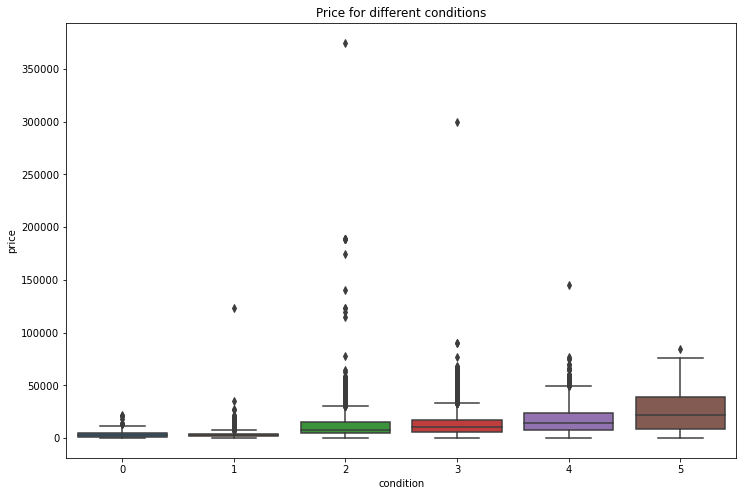

In [43]:
# Checking price with condition e
sns.boxplot(x='condition', y='price', data=df1).set(title = 'Price for different conditions')
plt.show()

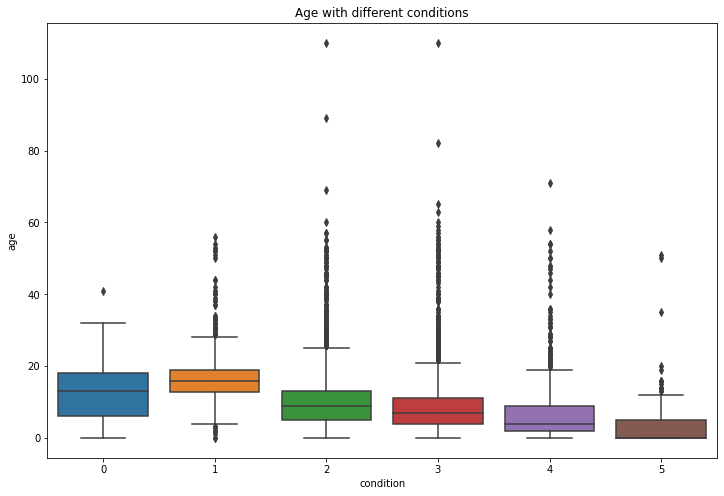

In [44]:
# Checking age with condition 
sns.boxplot(x='condition', y='age', data=df1).set(title = 'Age with different conditions')
plt.show()


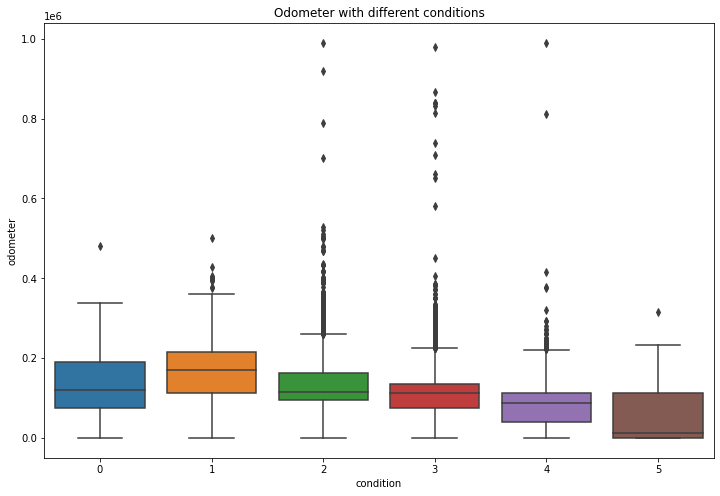

In [45]:
# Checking odometer with condition 
sns.boxplot(x='condition', y='odometer', data=df1).set(title = 'Odometer with different conditions')
plt.show()


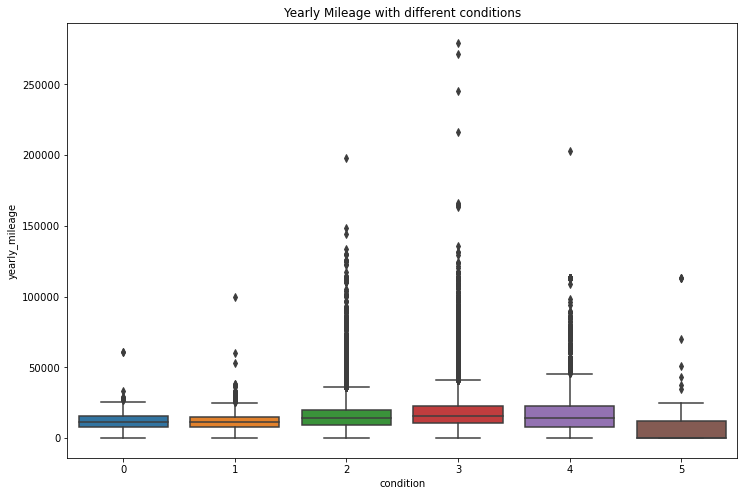

In [46]:
# Checking odometer with condition 
sns.boxplot(x='condition', y='yearly_mileage', data=df1).set(title = 'Yearly Mileage with different conditions')
plt.show()



We see different spread of data depending on the condition. The more used, the more outliers, for all attributes. This is expected as the more a vehicle is used, the more its condition and all other factors change depending on how much it was used. 

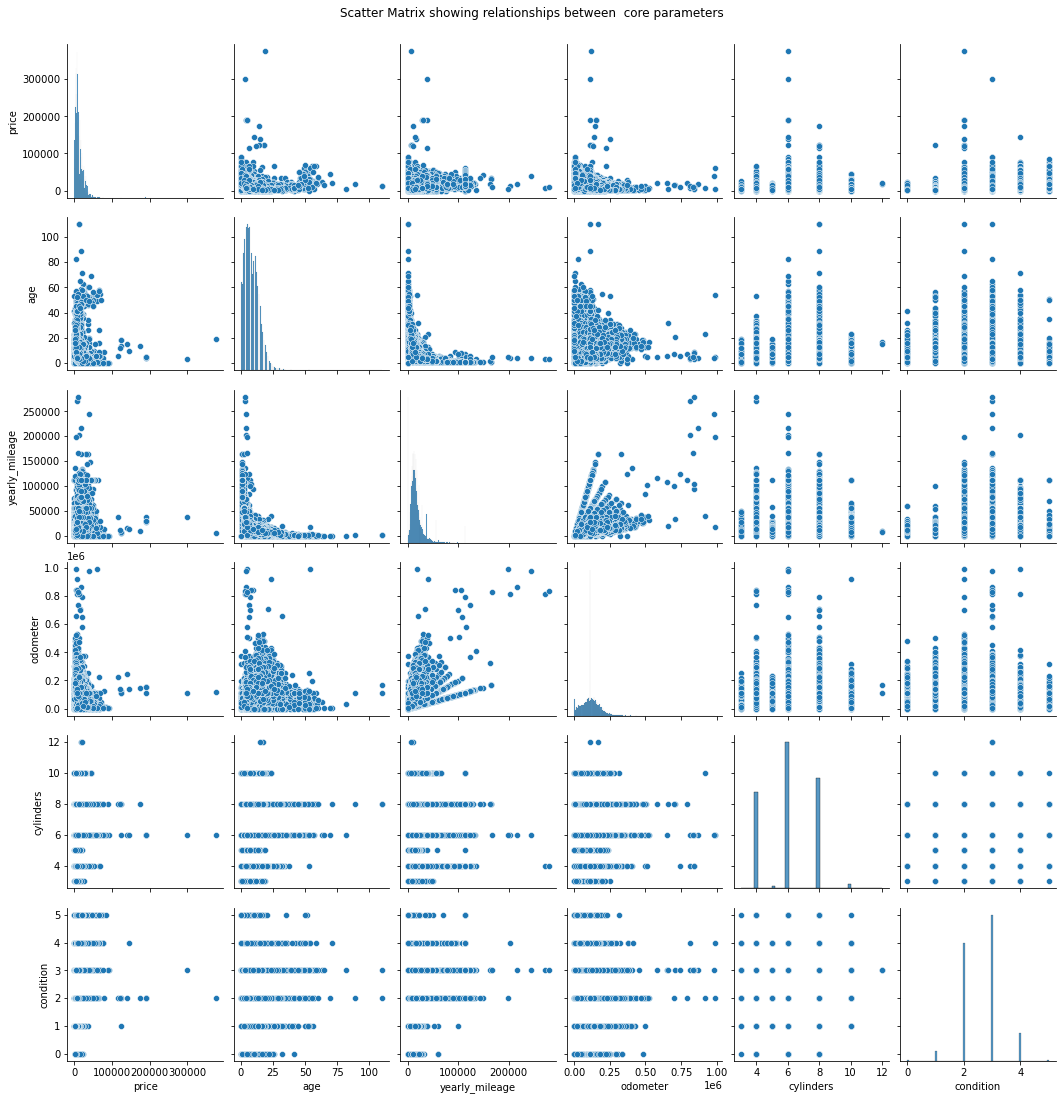

In [47]:
# scatter matrix to get a visual representation of the earlier correlation matrix
ax = sns.pairplot(
    df1[['price', 
     'age',
     'yearly_mileage',
     'odometer', 
     'cylinders', 
     'condition',  
    ]]
)
ax.fig.suptitle('Scatter Matrix showing relationships between  core parameters', y = 1.02);


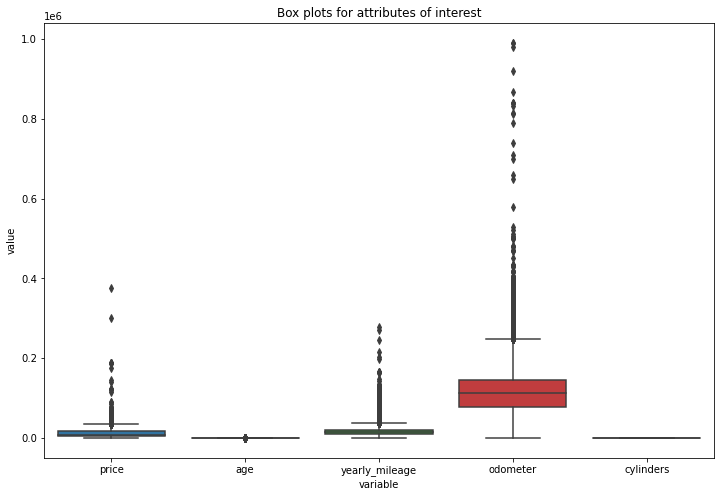

In [48]:
# Let's check the distribution of each core parameter
num_col_list = [
     'price', 
     'age', 
     'yearly_mileage',
     'odometer', 
     'cylinders',  
    ]
sns.boxplot(data=df1.melt(value_vars=num_col_list),
            x='variable', y='value').set(title = 'Box plots for attributes of interest')
plt.show()
# The units are too far apart, let's plot each one individually 

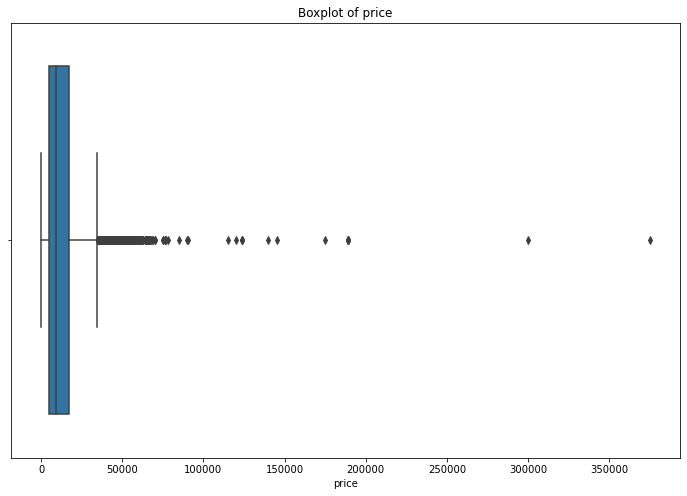

In [49]:
# Price 
sns.boxplot(data = df1, x = 'price').set(title='Boxplot of price')
plt.show()

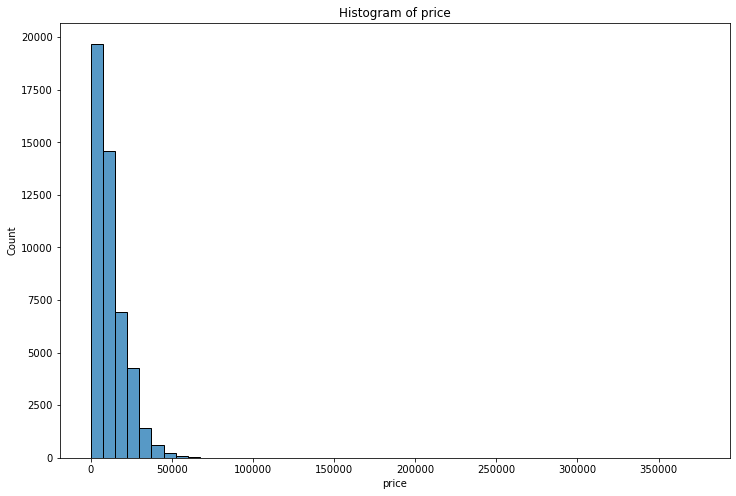

In [50]:
sns.histplot(data = df1, x = 'price', bins = 50).set(title = 'Histogram of price')
plt.show()

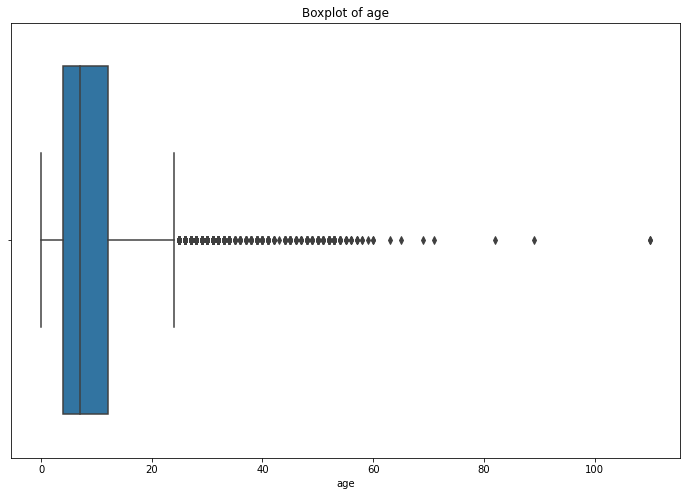

In [51]:
# Age
sns.boxplot(data = df1, x = 'age').set(title='Boxplot of age')
plt.show()

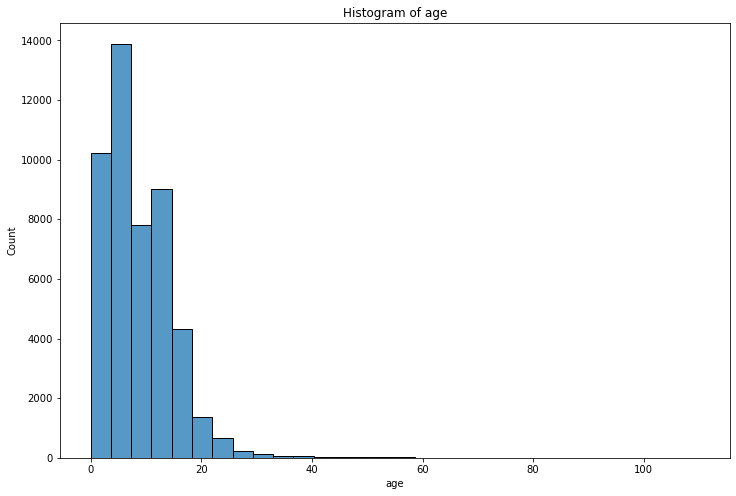

In [52]:
sns.histplot(data = df1, x = 'age', bins = 30).set(title = 'Histogram of age')
plt.show()

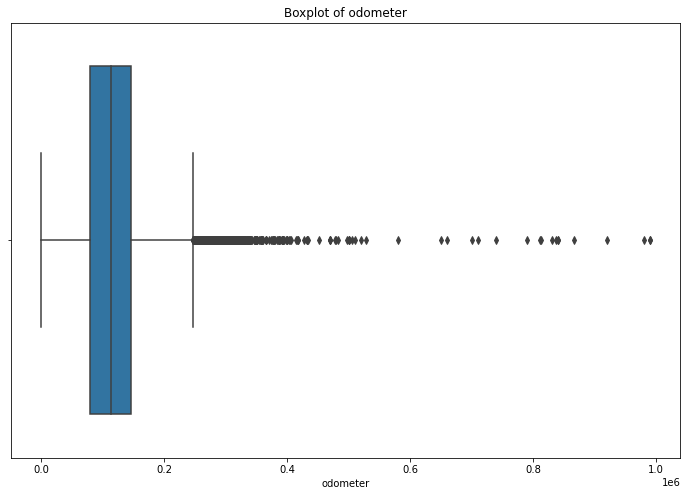

In [53]:
# Odometer
sns.boxplot(data = df1, x = 'odometer').set(title='Boxplot of odometer')
plt.show()

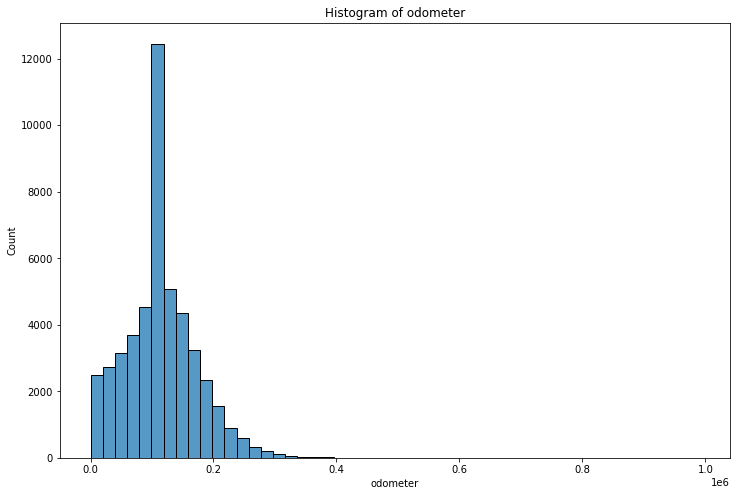

In [54]:
sns.histplot(data = df1, x = 'odometer', bins = 50).set(title = 'Histogram of odometer')
plt.show()

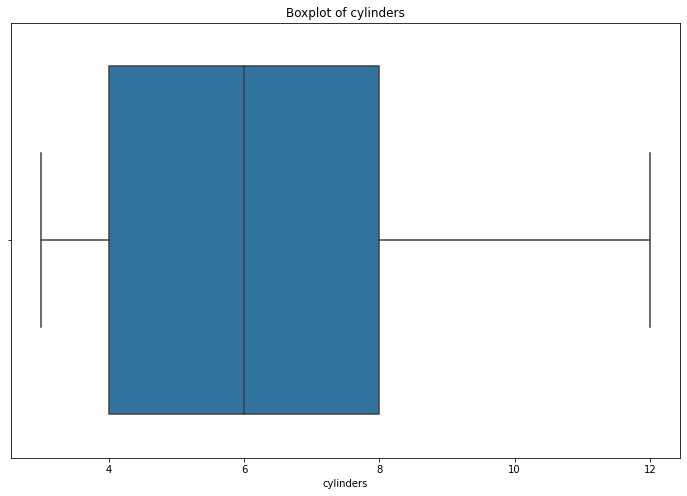

In [55]:
# Cylinders
sns.boxplot(data = df1, x = 'cylinders').set(title='Boxplot of cylinders')
plt.show()

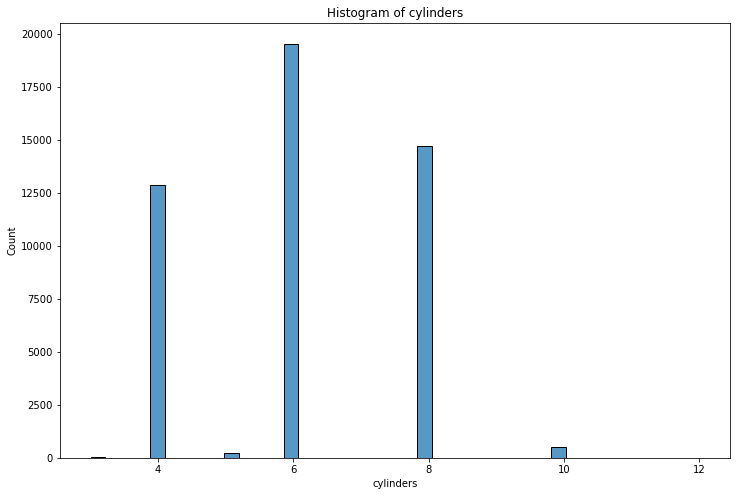

In [56]:
sns.histplot(data = df1, x = 'cylinders').set(title = 'Histogram of cylinders')
plt.show()

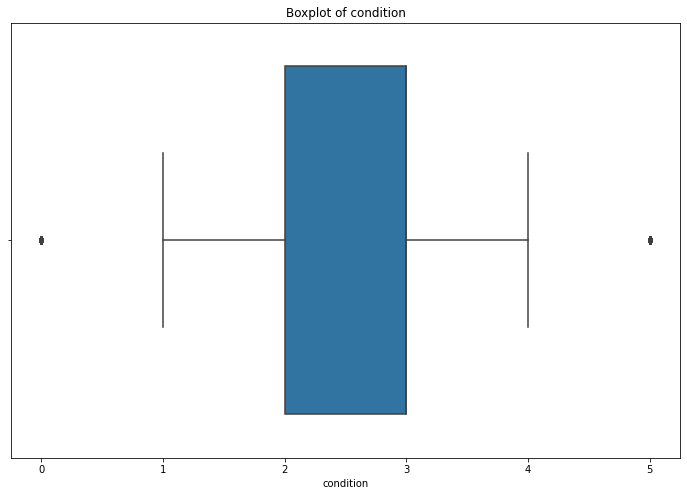

In [57]:
# Condition
sns.boxplot(data = df1, x = 'condition').set(title='Boxplot of condition')
plt.show()

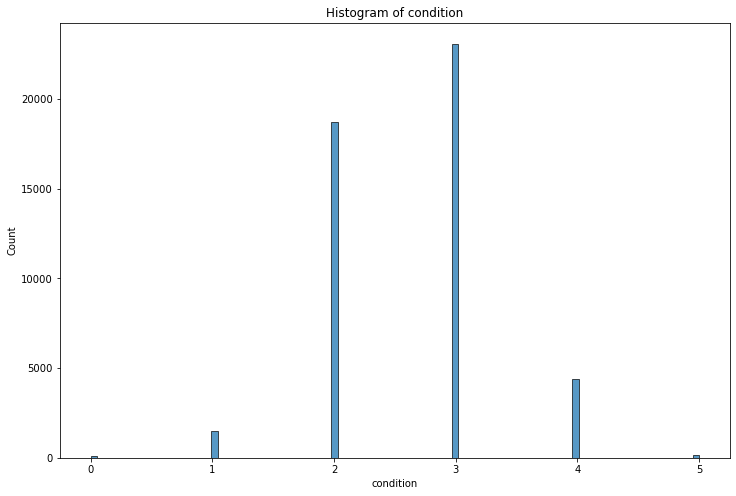

In [58]:
sns.histplot(data = df1, x = 'condition').set(title = 'Histogram of condition')
plt.show()

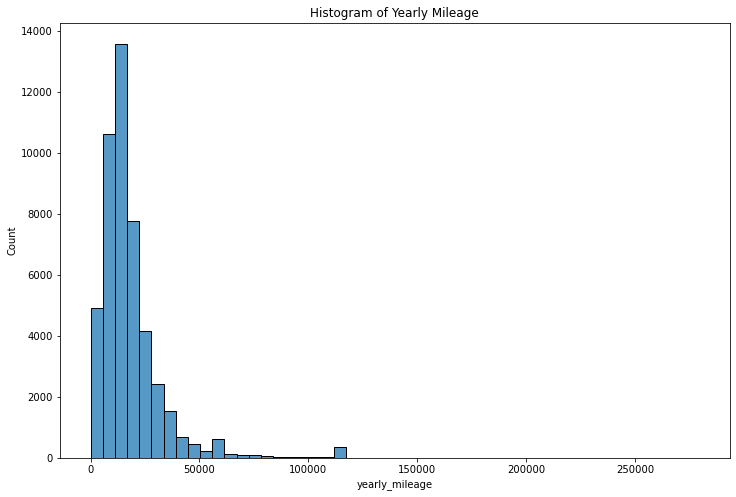

In [59]:
# Yearly_mileage
sns.histplot(data = df1, x = 'yearly_mileage', bins = 50).set(title = 'Histogram of Yearly Mileage')
plt.show()

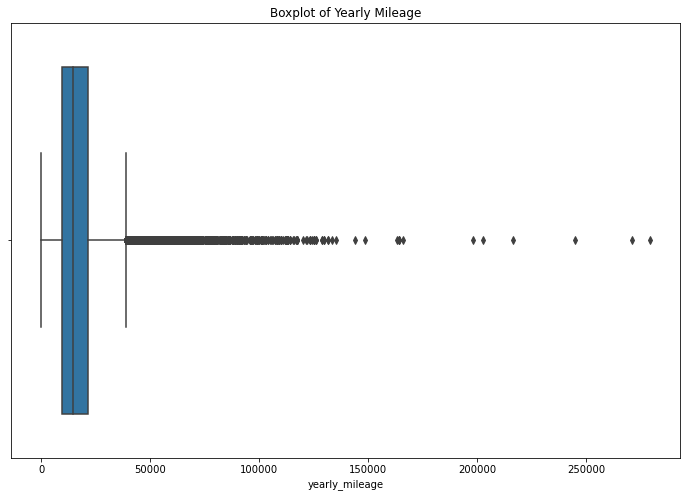

In [60]:
# Yearly_mileage
sns.boxplot(data = df1, x = 'yearly_mileage').set(title='Boxplot of Yearly Mileage')
plt.show()

### Conclusions  
`price`: outliers, most of the distribution lies under 50,000, highly skewed.  
`cylinders`: most cars have 6 cylinders, 4 and 8 follow  
`odometer`: mostly under 180000, quite normalish looking distribution, outliers yes  
`age`: cars are mainly under 20 years of age, past that are mostly outliers  
`condition`: main conditions are 2 and 3, while least common are 0 and 5  
`yearl_mileage`: skewed to the right, with outliers, expected as this an engineered variable based on odometer so it will behave similarly.
Note: I won't be changing anything about condition and cylinder as these variables have very limited  
unique values.

## Study and treat outliers

Given the results above, we determine what columns may contain outliers, and create a DataFrame without those outliers. 

In [61]:
# Removing outliers
cols = ['price', 'odometer', 'age', 'yearly_mileage'] 
# Lower limit
Q1 = df1[cols].quantile(0.25)
# Upper limit
Q3 = df1[cols].quantile(0.75)
# Interquartile Range
IQR = Q3 - Q1



In [62]:
# Store data without outliers in a separate DataFrame
# Conditions for outliers based on IQR
df_no = df1[~((df1[cols] < (Q1 - 1.5 * IQR)) |(df1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [63]:
# Make sure the new dataframe looks good
df_no.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,yearly_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,1,2018-06-23,19,7.0,20714
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,6.0,18333
3,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,others,0,2019-03-22,9,16.0,7062
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,4.0,14488
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,3.0,26404


In [64]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42017 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           42017 non-null  int32         
 1   model_year      42017 non-null  int32         
 2   model           42017 non-null  object        
 3   condition       42017 non-null  int64         
 4   cylinders       42017 non-null  int32         
 5   fuel            42017 non-null  object        
 6   odometer        42017 non-null  int32         
 7   transmission    42017 non-null  object        
 8   type            42017 non-null  object        
 9   paint_color     42017 non-null  object        
 10  is_4wd          42017 non-null  int32         
 11  date_posted     42017 non-null  datetime64[ns]
 12  days_listed     42017 non-null  int32         
 13  age             42017 non-null  float64       
 14  yearly_mileage  42017 non-null  int32         
dtypes:

## Study core parameters without outliers

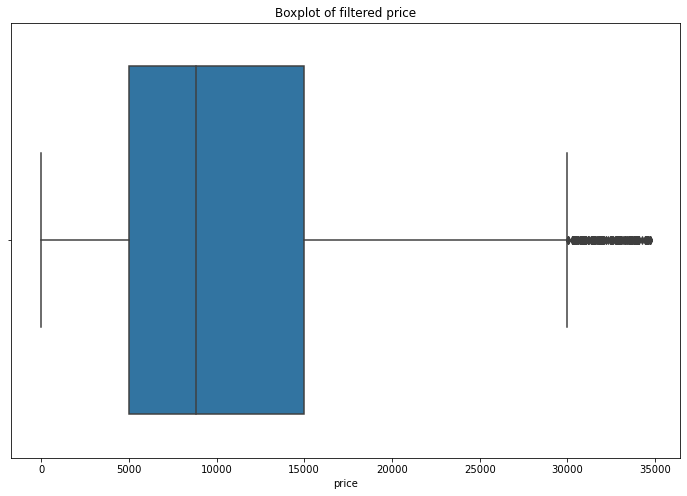

In [65]:
# Since we're comparing outliers I will only one type of plot for each core parameter that was changed
# Price

sns.boxplot(data = df_no, x = 'price').set(title='Boxplot of filtered price')
plt.show()


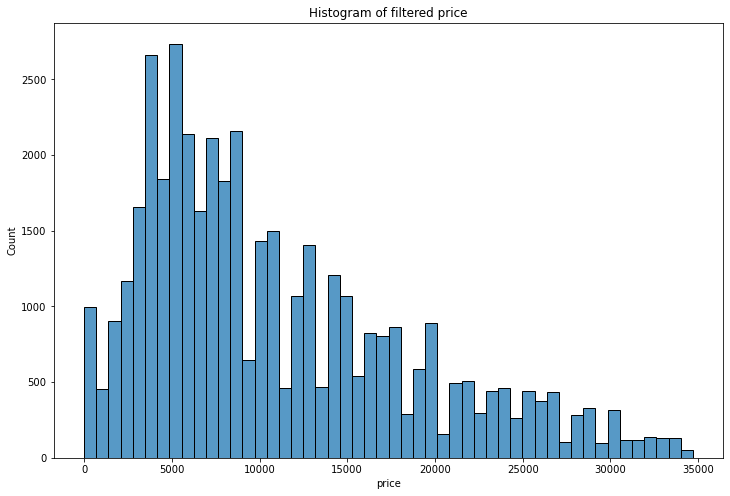

In [66]:
sns.histplot(data = df_no, x = 'price', bins = 50).set(title = 'Histogram of filtered price')
plt.show()
# Less skewed

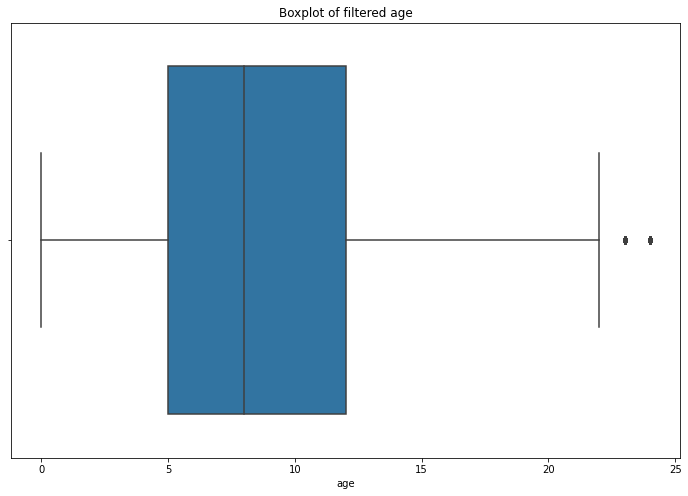

In [67]:
sns.boxplot(data = df_no, x = 'age').set(title='Boxplot of filtered age')
plt.show()

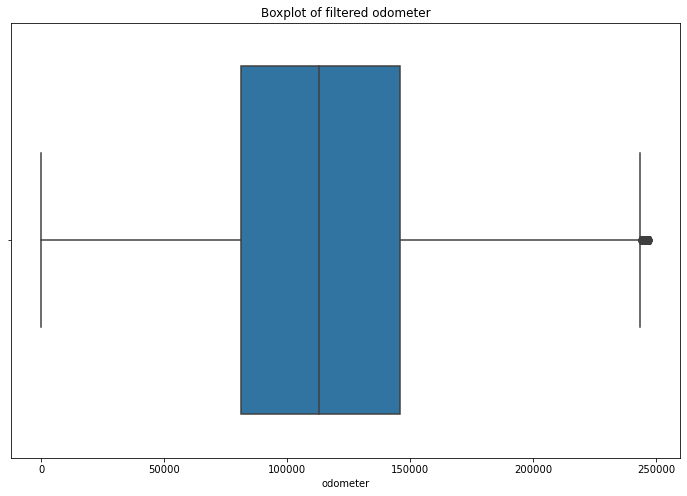

In [68]:
sns.boxplot(data = df_no, x = 'odometer').set(title='Boxplot of filtered odometer')
plt.show()


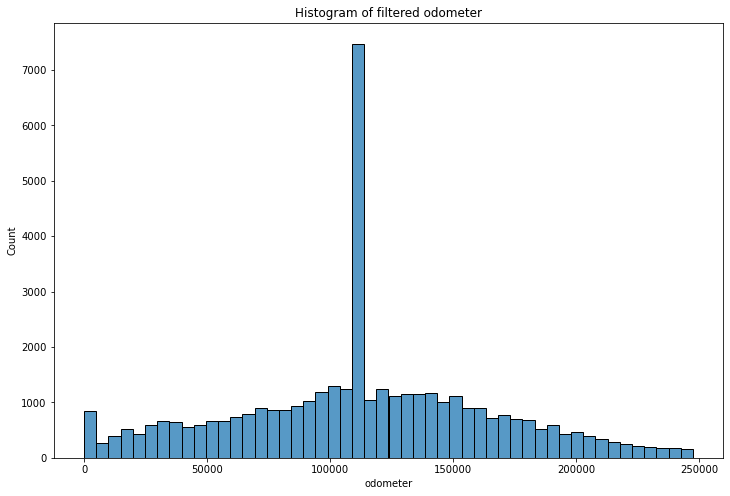

In [69]:
sns.histplot(data = df_no, x = 'odometer', bins = 50).set(title = 'Histogram of filtered odometer')
plt.show()

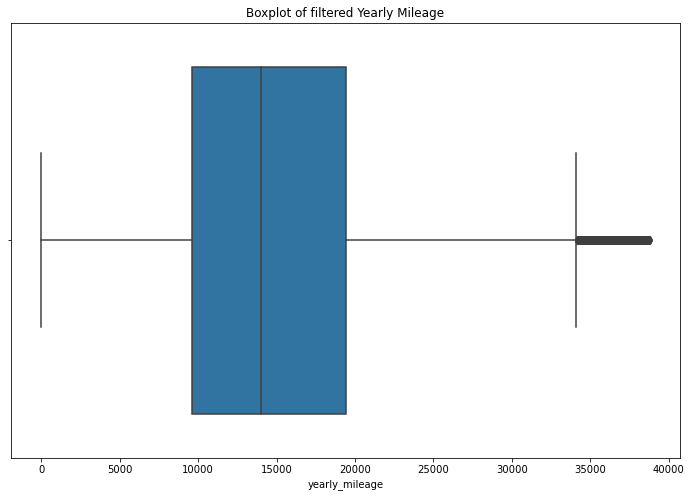

In [70]:
# Yearly_mileage
sns.boxplot(data = df_no, x = 'yearly_mileage').set(title='Boxplot of filtered Yearly Mileage')
plt.show()



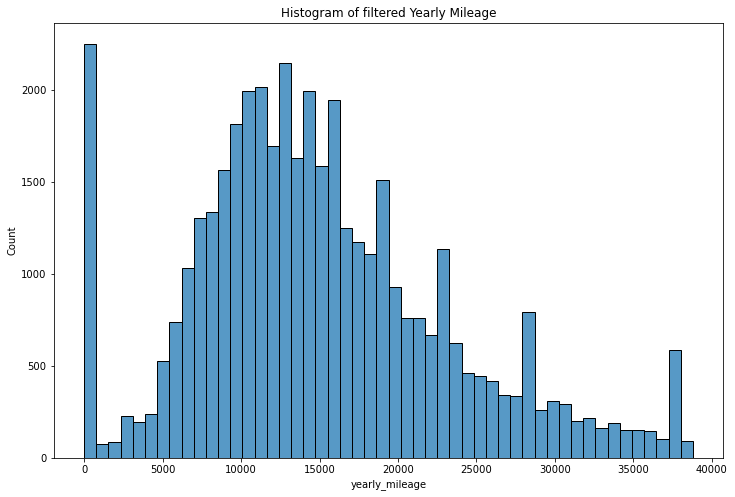

In [71]:
sns.histplot(data = df_no, x = 'yearly_mileage', bins = 50).set(title = 'Histogram of filtered Yearly Mileage')
plt.show()

Comments:
The plots as we expected show less values outside of the main distribution. Yes, we do have extreme  
values for age and price, but this is normal. 

## Ads lifetime

 Let's study the typical lifetime of an ad (`days_listed`).

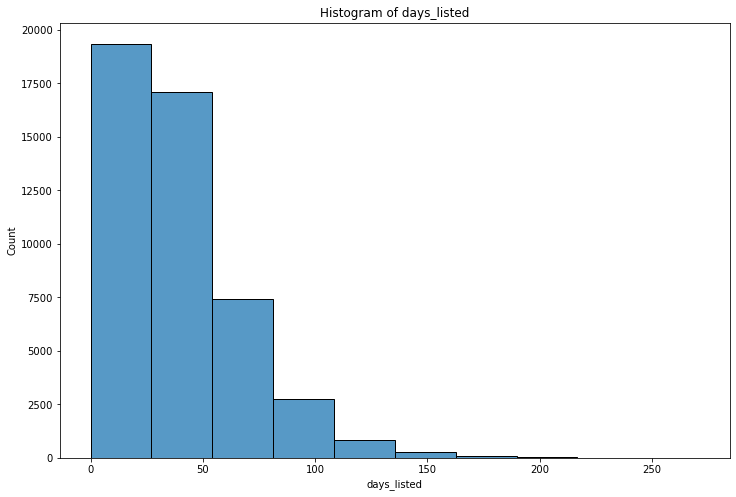

In [72]:
# Histogram
sns.histplot(data = df1, x = 'days_listed', bins = 10).set(title = 'Histogram of days_listed')
plt.show()
# Skewed as expected - longer ads are up, the more likely cars are to be sold and ads to be gone.

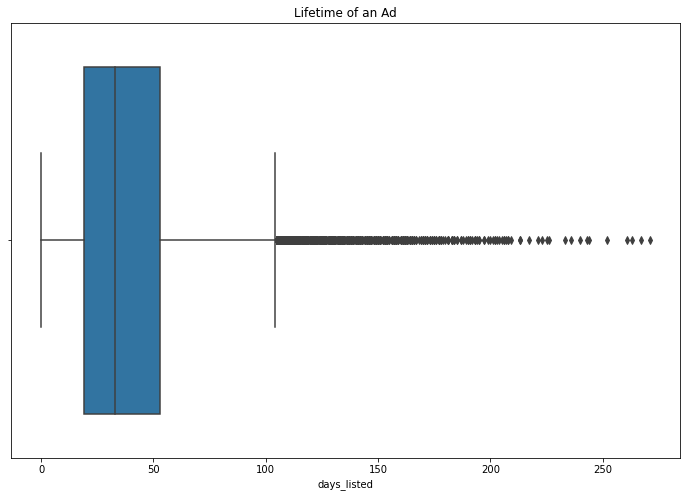

In [73]:
 # days_posted in days
sns.boxplot(data = df_no, x = 'days_listed').set(title='Lifetime of an Ad')
plt.show()

In [74]:
df_no['days_listed'].describe()

count    42017.000000
mean        39.566461
std         28.246962
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [75]:
print('The mean number of days advertisements were displayed is {:.2f} days and the median is {:.1f} days'
      .format(df_no['days_listed'].mean(), df_no['days_listed'].median()))

The mean number of days advertisements were displayed is 39.57 days and the median is 33.0 days


Typical ad is posted for ~40 days with a median value of of 33 days. Given that this attribute has many 
extreme values, median would be a better indicator of average lifespan of the ad. There is a min value of 0, which means some cars are sold on the day they are posted. The longest ad has been for 271 days, which sounds possible, depending on the car. 

In [76]:
# vehicles with longest listing time
days_listed_0 = df_no.query('days_listed <= 1')
len(days_listed_0)

185

In [77]:
# vehicles with shortest listing time
days_listed_100 = df_no.query('days_listed >= 100')
len(days_listed_100)

1658

In [78]:
days_listed_common = df_no.query('1 <= days_listed <= 75')
len(days_listed_common)

37448

In [79]:
print(
    'Mean number of hours for listing less than a day is {:.1f} hours'.format(
        days_listed_0['days_listed'].mean() * 24)
)


Mean number of hours for listing less than a day is 18.6 hours


Comments:
There are very little cars sold under a day. The bulk of the sales fall under 75 and above 1 days.

## Average price per each type of vehicle

Analyze the number of ads and the average price for each type of vehicle. 

In [80]:
# aggregate of data by vehicle type, days listed across vehicles
normal_listing = df_no.pivot_table(
    index='type', values='days_listed', aggfunc=['mean', 'count']
)
normal_listing.columns = ['mean_days_listed', 'vehicles']
print(normal_listing.sort_values(by='mean_days_listed', ascending=False).head())
# There doesn't seem to be difference between mean ad lifetime between vehicle type
# Wagon and Van have the highest count

           mean_days_listed  vehicles
type                                 
bus               46.300000        20
hatchback         41.410574       889
offroad           41.347305       167
wagon             40.622372      1332
van               40.124760       521


In [81]:
# calculate the average price per vehicle type
brand_stat = df_no.pivot_table(
    index='type', values = 'price', aggfunc = 'mean'
)
print(brand_stat)

                    price
type                     
SUV          10170.019327
bus          19013.250000
convertible  12572.763240
coupe        13041.129104
hatchback     6660.149606
mini-van      7781.857576
offroad      14118.365269
other         9779.272277
pickup       14782.857802
sedan         6778.673805
truck        14710.192923
van           8585.756238
wagon         8823.675676


In [82]:
# Join the 2 tables together
normal_brand_listing = normal_listing.join(brand_stat, on='type').reset_index()
print(normal_brand_listing)

           type  mean_days_listed  vehicles         price
0           SUV         39.882212     10400  10170.019327
1           bus         46.300000        20  19013.250000
2   convertible         37.825545       321  12572.763240
3         coupe         39.038954      1797  13041.129104
4     hatchback         41.410574       889   6660.149606
5      mini-van         39.015152       990   7781.857576
6       offroad         41.347305       167  14118.365269
7         other         37.123762       202   9779.272277
8        pickup         39.162486      5422  14782.857802
9         sedan         39.511377     10460   6778.673805
10        truck         39.383214      9496  14710.192923
11          van         40.124760       521   8585.756238
12        wagon         40.622372      1332   8823.675676


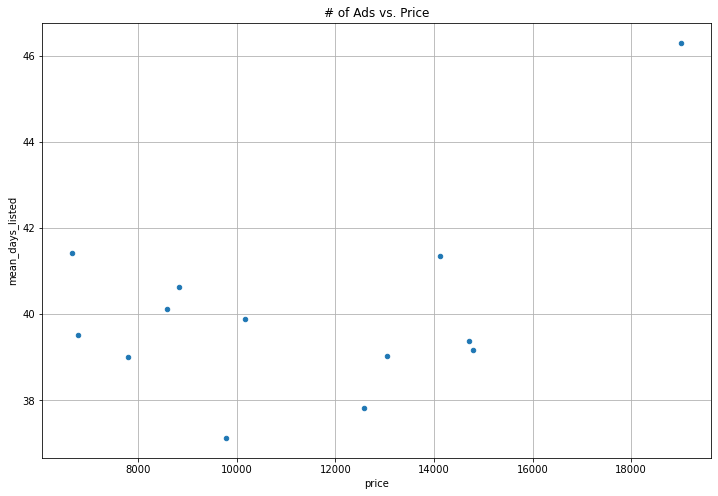

In [83]:
# Number of ads vs. price
normal_brand_listing.plot(
    x='price', 
    y='mean_days_listed', 
    title = '# of Ads vs. Price', 
    kind='scatter', 
    grid=True
);
# There is no apparent relationship here between price and ads

In [84]:
type_grouped = df_no.pivot_table(index = 'type', values = 'price', aggfunc = ['count'])

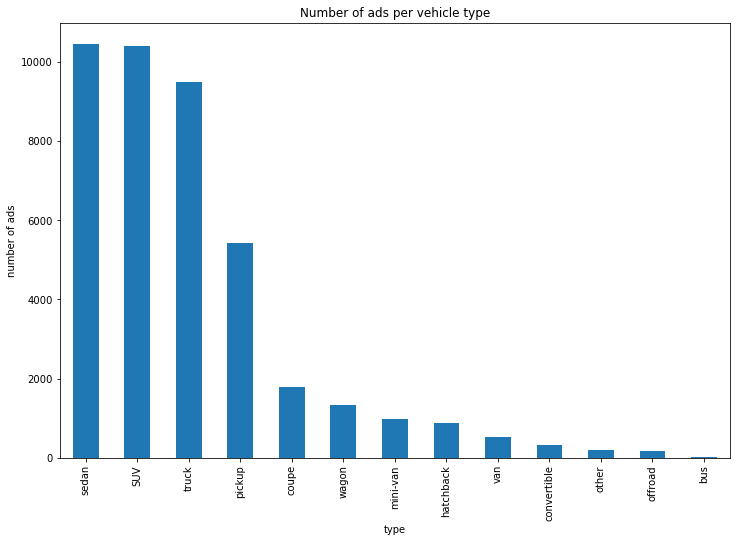

In [85]:
type_grouped['count'].sort_values(by = 'price', ascending = False).plot(kind = 'bar', legend = False)
plt.title('Number of ads per vehicle type')
plt.ylabel('number of ads')
plt.show()

Above we see that SUV and Sedan are the two most popular types of vehicles in this dataset. I'll create a subset of the data that only includes these types of vehicles.

## Price factors

What factors impact the price most? 

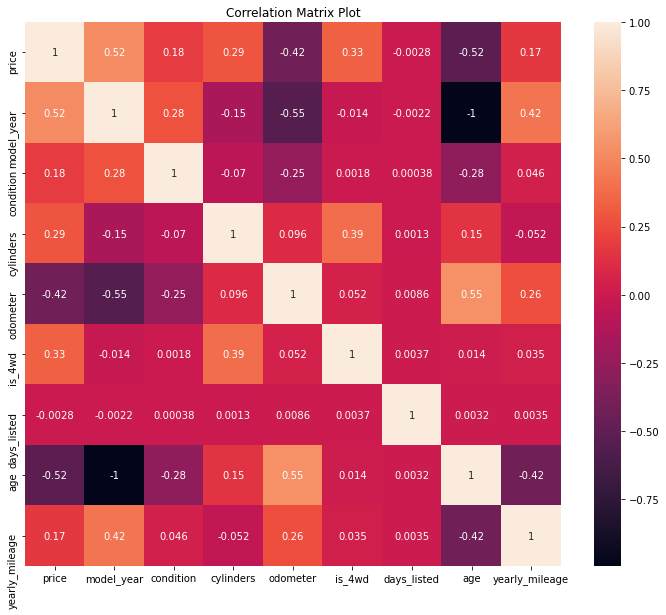

In [86]:
# Let's remind ourselves of the relationships using heat map
# correlation matrix 

plt.figure(figsize=(12, 10))

corrMatrix = df_no.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix Plot')
plt.show()


In [87]:
# The highest correlations : model_year, odometer, is_4wd, age. 
# condition is dependent on age (in most cases), yearly_mileage is extracted from odometer


Further analyze the following parameters  
`model_year`: moderate positive correlation  
`odometer`: moderate negative correlation  
`age`: moderate negative correlation (related to odometer)  
`is_4wd`: weak-moderate positive correlation  


In [88]:
# Focusing on only 2 vehicles types 
popular_types = df_no[df_no['type'].isin(['SUV', 'sedan'])]

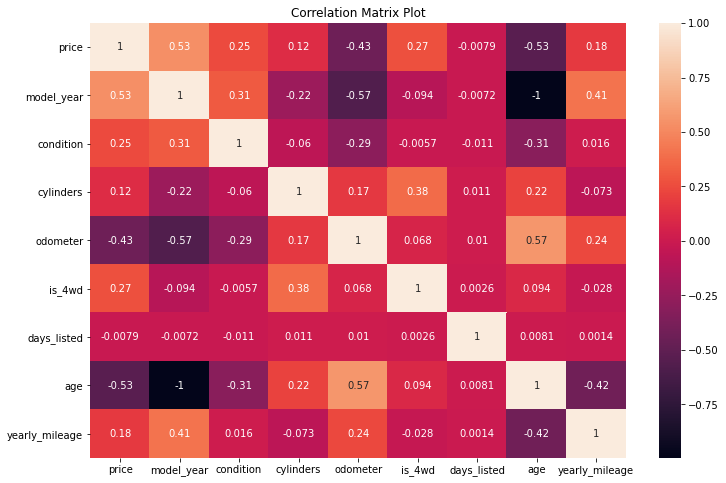

In [89]:
corrMatrix = popular_types.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix Plot')
plt.show()
# My the correlations are quite similar, only notable change was model_year from .18 to .25
# Below plots will use the the filtered data including only SUV and sedan

[Text(0.5, 1.0, 'Model Year on Price')]

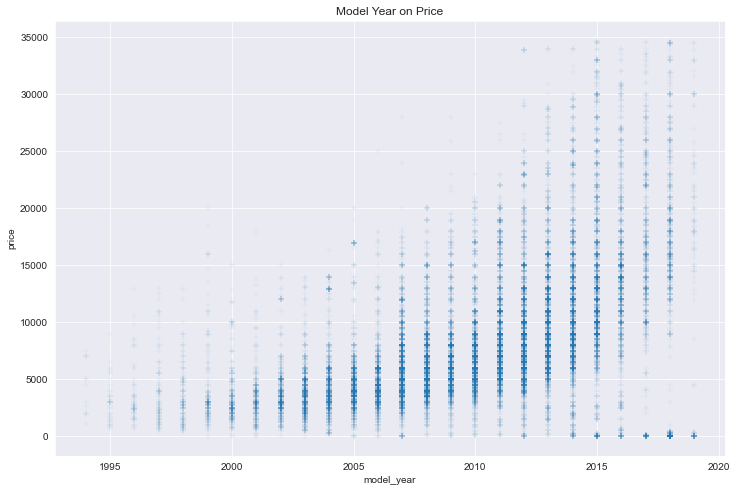

In [90]:
# model_year
sns.set_style("darkgrid")

sns.scatterplot(
    data=popular_types, x="model_year", y="price", marker = '+', alpha = 0.1).set(title='Model Year on Price')
# In general, the newer the car, the higher the price

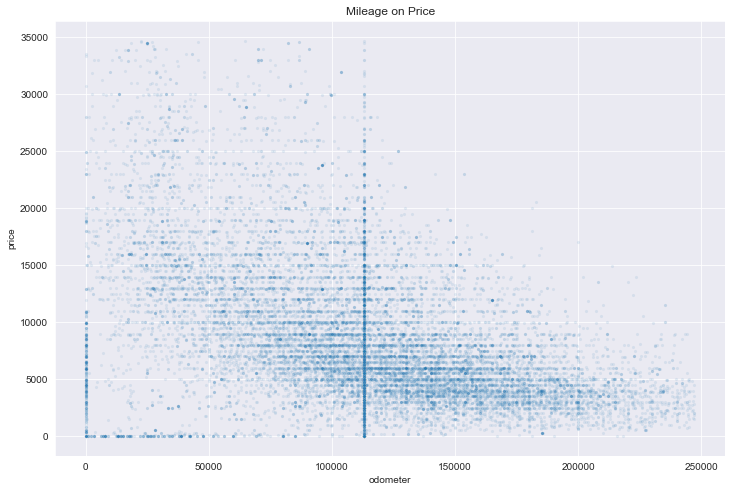

In [92]:
# odometer
sns.scatterplot(
    data=popular_types, x="odometer", y="price", s = 10, alpha = 0.1
).set(title='Mileage on Price')
# On average, the lower the odometer reading, the higher the price

plt.show()

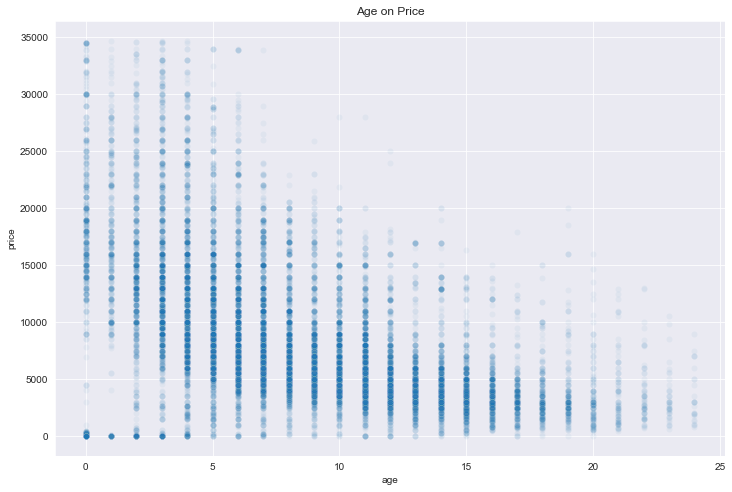

In [93]:
# Age
sns.scatterplot(
    data=popular_types, x="age", y="price", alpha = 0.05
).set(title='Age on Price')

# We see some negative correlation here
plt.show()

In [94]:
# START HERE 
df_cat_interest = [ 'model', 'condition', 'cylinders', 'fuel',
       'transmission', 'type', 'paint_color', 'is_4wd',
       ]

In [95]:
popular_types.condition.value_counts()
# Drop the condition 0s

3    10785
2     7456
4     2036
1      484
5       52
0       47
Name: condition, dtype: int64

In [96]:
popular_types.is_4wd.value_counts()

0    13007
1     7853
Name: is_4wd, dtype: int64

In [97]:
popular_types.fuel.value_counts()
# Drop other and electric 

gas         20493
diesel        216
hybrid        136
other          14
electric        1
Name: fuel, dtype: int64

In [98]:
popular_types.transmission.value_counts()

automatic    19691
manual         927
other          242
Name: transmission, dtype: int64

In [99]:
popular_types.paint_color.value_counts()

others    3752
black     3355
silver    3108
white     2907
grey      2385
blue      1957
red       1620
green      539
brown      531
custom     522
orange      71
yellow      57
purple      56
Name: paint_color, dtype: int64

In [98]:
popular_types.is_4wd.value_counts()

0    13007
1     7853
Name: is_4wd, dtype: int64

In [100]:
df_50 = popular_types.loc[~((popular_types['fuel'] == 'electric') | (popular_types['fuel'] == 'other')|(popular_types['condition']==0)),:]


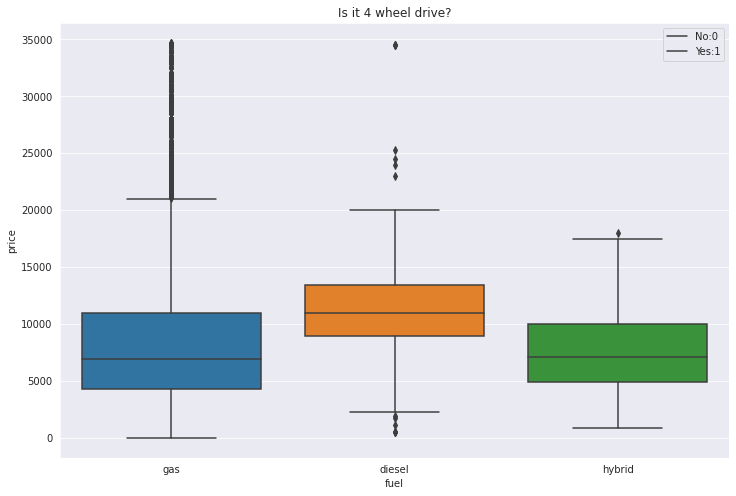

In [123]:
# Example from reviewer

col = 'fuel'
correct_values = popular_types.groupby(col).agg({'model': 'count'}).query('model > 50').index.tolist()

ax = sns.boxplot(x=col, y="price", 
                 data=popular_types[popular_types[col].isin(correct_values)]
                 ).set(title = 'Is it 4 wheel drive?')
plt.legend(('No:0','Yes:1'))
plt.show()

In [101]:
df_50.fuel.value_counts()

gas       20448
diesel      216
hybrid      134
Name: fuel, dtype: int64

In [102]:
df_50.condition.value_counts()

3    10778
2     7450
4     2035
1      483
5       52
Name: condition, dtype: int64

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

In the problem we see the following line: ** When analyzing categorical variables, note that there must be at least 50 ads in categories; otherwise their parameters will be invalid for analysis.**
This means that if we take, for example, is_4wd, we need to check how many different ads there are for each category: 1 and 0. Each ad is a new row in the dataframe. And so, we just need to use groupby and count, for example.
Thus, we are not talking about a specific car or the same ad posted more than once. We are interested in whether there are any rare categories that we need to exclude from the analysis.
    

</div>

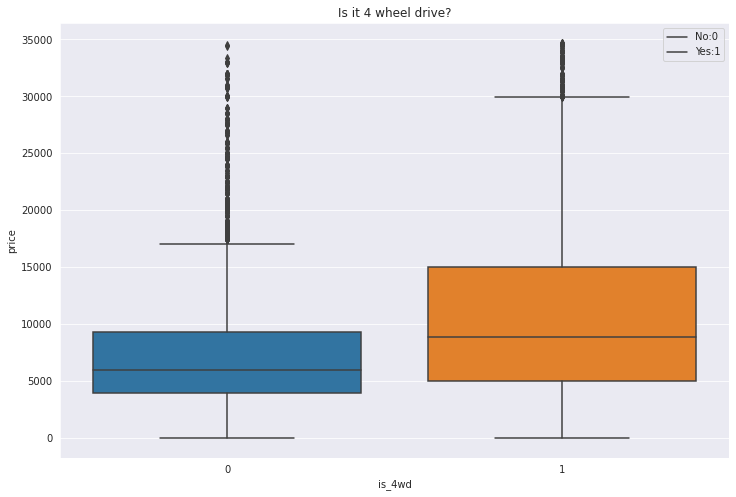

In [103]:

ax = sns.boxplot(x="is_4wd", y="price", data=df_50
                 ).set(title = 'Is it 4 wheel drive?')
plt.legend(('No:0','Yes:1'))

#4 wheel drive vehicles have no extreme values whereas non 4 wheel drives have outliers as well as tighter dist.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Everything is very good. Just check again the condition. "Categories must have at least 50 ads". Meaning that the number (count) of different ads should be more than 50, not days_listed of each ad.

</div>

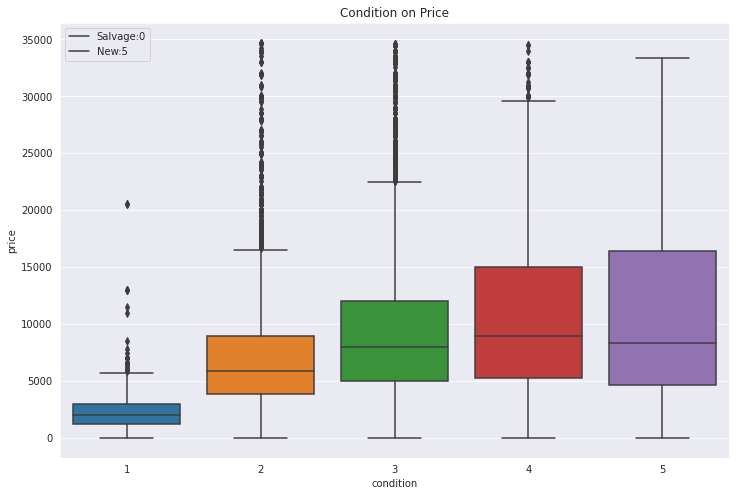

In [104]:
ax = sns.boxplot(x="condition", y="price", data=df_50
                 ).set(title = 'Condition on Price')
plt.legend(('Salvage:0','New:5'))


# We see that the newer the car (new, like-new) --> no extreme values/outliers and wider the distribution
# Salvage/old cars have tighter distrubtions but have exceptions (old but high priced = well kept)


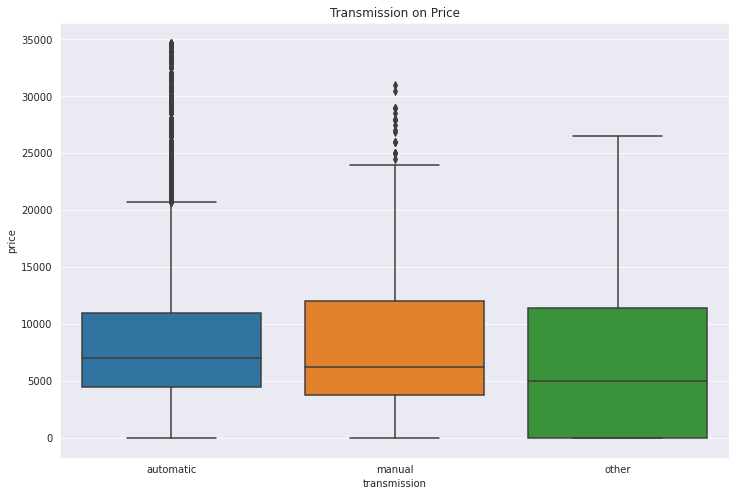

In [105]:
ax = sns.boxplot(x="transmission", y="price", data=df_50
                 ).set(title = 'Transmission on Price')
plt.show()

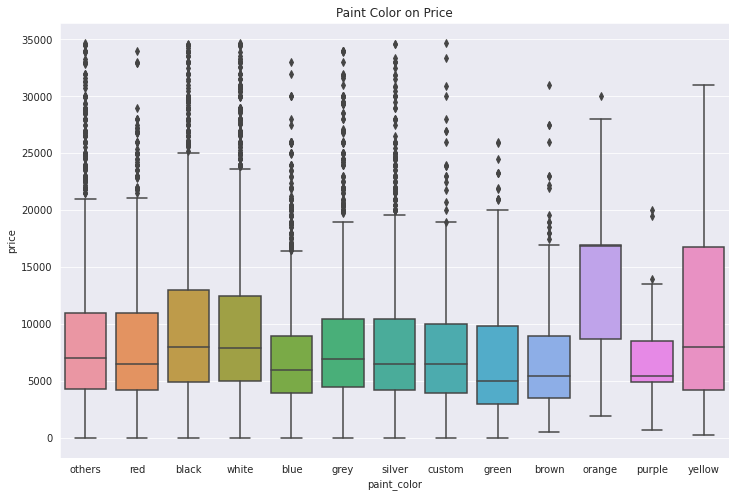

In [106]:
ax = sns.boxplot(x="paint_color", y="price", data=df_50
                 ).set(title = 'Paint Color on Price')
plt.show()

Comments:  
Age is calculated based on model_year so we see the same(but inverse) relationship
Odometer is a signal of vehicle condition, higher the odometer, worse the condition, lower the price.
4wd seems to be a somewhat significant factor, I suppose people care whether their car has 4wd which may drive up the price. Our visuals confirmed our numerical prepositions that these factors affect the price of the vehicle the most. 



<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very nice plots and solid conclusions.
    
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The task says that we also need to use transmission type and color. Could you add them to the analysis?
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Good, thank you
</div>


## General conclusion

From the data preprocessing stage, we identified missing values in our data and noted that the values are Missing at random (MAR). We used a different methods for handling the missing values on a case-by-case basis. We dropped missing values where the data % was low, replaced those values in columns that had high number of missing values using mean/median. We then identified different data types and proceeded to change datatypes. We made calculations, created new features and used those features to determine the vehicle's age in years age_in_years, and the average miles per year. We plotted the distribution of the data and observed some anomalies in the data. Our data was mostly skewed thus we detected and removed some outliers from the data based on attributes of interest. We used the filtered data to plot new visualizations and compare them, followed by data analysis using filtered data. From our analysis, we found that the typical lifetime of an ad is around one month. We also observe that ads were rarely removed quickly after 1 day, and ads were abnormally listed for 271 days.

We observe that the bus and hatchback are the two types with the greatest number of ads. We looked at the relationships between attributes and price and further explored those via visualizations. We saw the 3 most important factors affecting price were : model_year, odometer, and whether the vehicle is 4wd. 

<div class="alert alert-block alert-success">

<b>Reviewer's general comment</b> <a class="tocSkip"></a>

A good conclusion. And in general, an exellent project. I like the way you structured it and presented it with wonderful plots.
    
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's general comment</b> <a class="tocSkip"></a>

You've done a great job, we need to fix a few inaccuracies and then the job can be approved. If you have any questions, please don't hesitate to ask.

What should be paid attention to:  
   
- change 'odometer' to 'yearly_mileage' in all cells starting from 1.6
- set titles for each plot
- analyse dependence of the **number of ads** on the vehicle type
- select the two types with the greatest number of ads
- check condition for categorical parameters before building boxplots
- analysis for transmission type and color

    
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's general comment V2</b> <a class="tocSkip"></a>

Thank you for taking the time to improve the project. Let's just finish with checking the number of ads in each category.


</div>

<div class="alert alert-block alert-success">

<b>Reviewer's general comment V2</b> <a class="tocSkip"></a>

    
Great! Now it is accepted. You can move on to the next module. Congratulations!


</div>